In [39]:
from importlib import reload

import datasets
import create_gate_circs_np
import train_circ_np

reload(datasets)
reload(create_gate_circs)
reload(train_circ)

ModuleNotFoundError: No module named 'torch'

In [ ]:
from datasets import TorchDataset
from create_gate_circs import get_circ_params, TQCirc, generate_random_gate_circ
from train_circ import train_tq_model

import pickle as pkl
import torch
import os
import numpy as np

num_qubits = 10

device = torch.device('cpu')

dataset = 'mnist_10'

train_data = TorchDataset(dataset, 'angle', 1, True)
test_data = TorchDataset(dataset, 'angle', 1, False)

train_data_loader = torch.utils.data.DataLoader(train_data, batch_size=1, sampler=torch.utils.data.RandomSampler(train_data))
test_data_loader = torch.utils.data.DataLoader(train_data, batch_size=1, sampler=torch.utils.data.RandomSampler(train_data))

val_test_data_loader = torch.utils.data.DataLoader(test_data, batch_size=100, sampler=torch.utils.data.SequentialSampler(test_data))

loss = torch.nn.functional.nll_loss
val_loss = torch.nn.NLLLoss(reduction='none')

for i in range(396, 400):
    curr_dir = './experiment_data/{}/trained_circuits/circ_{}'.format(dataset, i + 1)

    circ_gates, gate_params, inputs_bounds, weights_bounds = get_circ_params(curr_dir) 

    model = TQCirc(circ_gates, gate_params, inputs_bounds, weights_bounds, num_qubits, True).to(device)
    opt = torch.optim.SGD(model.parameters(), lr=0.05)
    
    losses_list = []
    accs_list = []
    
    for j in range(1):
        curr_train_dir = curr_dir + '/run_{}'.format(j + 1)

        if os.path.exists(curr_train_dir):
            pass
        else:
            os.mkdir(curr_train_dir)
    
        accs_history = train_tq_model(model, opt, loss, train_data_loader, test_data_loader, 120000, 1000, 1000)
        
    torch.save(model.state_dict(), curr_dir + '/model.pt')

Step 1 | Accuracy: 0.0
Step 1001 | Accuracy: 0.0
Step 2001 | Accuracy: 0.0
Step 3001 | Accuracy: 1.0
Step 4001 | Accuracy: 1.0
Step 5001 | Accuracy: 0.0
Step 6001 | Accuracy: 0.0
Step 7001 | Accuracy: 1.0
Step 8001 | Accuracy: 1.0
Step 9001 | Accuracy: 0.0
Step 10001 | Accuracy: 1.0
Step 11001 | Accuracy: 1.0
Step 12001 | Accuracy: 0.0
Step 13001 | Accuracy: 0.0
Step 14001 | Accuracy: 0.0
Step 15001 | Accuracy: 1.0
Step 16001 | Accuracy: 1.0
Step 17001 | Accuracy: 1.0
Step 18001 | Accuracy: 0.0
Step 19001 | Accuracy: 1.0
Step 20001 | Accuracy: 0.0
Step 21001 | Accuracy: 0.0
Step 22001 | Accuracy: 1.0
Step 23001 | Accuracy: 0.0
Step 24001 | Accuracy: 1.0
Step 25001 | Accuracy: 0.0


##  inference for MNISt-10 circuits

In [65]:
from datasets import TorchDataset, load_dataset
from create_gate_circs_np import get_circ_params, TQCirc, generate_random_gate_circ
from train_circ_np import train_tq_model

import pickle as pkl
import torch
import os
import numpy as np
import shutil

num_qubits = 10

device = torch.device('cpu')

dataset = 'mnist_10'

train_x, train_y, test_x, test_y = load_dataset(dataset, 'angle', 1)

print(test_y)

# loss = torch.nn.functional.nll_loss
# val_loss = torch.nn.NLLLoss(reduction='none')

# torch.inference_mode(True)

# for i in range(1):
#     curr_dir = './experiment_data/{}/trained_circuits/circ_{}'.format(dataset, i + 1)
    
#     circ_gates, gate_params, inputs_bounds, weights_bounds = get_circ_params(curr_dir) 

#     model = TQCirc(circ_gates, gate_params, inputs_bounds, weights_bounds, num_qubits, True).to(device)
    
#     model_data = torch.load(curr_dir + '/model.pt')
#     shutil.copyfile(curr_dir + '/model.pt', curr_dir + '/run_1/model.pt')
    
#     for j in range(1):
#         curr_run_dir = curr_dir + '/run_{}'.format(j + 1)
        
#         model_data = torch.load(curr_run_dir + '/model.pt')
#         model_params = list(model.parameters())

#         for l in range(160):
#             model_params[l].data.fill_(model_data['var_gates.{}.params'.format(l)].flatten().item())

#         curr_val_losses = []
#         curr_acc = 0

#         for k in range(400):
#             val_x, val_y = test_x[25 * k:(25 * k + 25)], test_y[25 * k:(25 * k + 25)]

#             val_preds = model(val_x)
#             curr_val_losses.append(val_loss(val_preds, val_y.to(torch.long)).detach().numpy().flatten())

#             val_class = torch.argmax(val_preds.detach(), 1).detach().numpy().flatten()

#             curr_acc += np.sum(val_class == val_y.detach().numpy().flatten().astype('int32'))

#         print(i + 1, curr_acc / 10000)

#         np.save(curr_run_dir + '/val_losses.npy', curr_val_losses)
#         np.savetxt(curr_run_dir + '/accs.txt', [curr_acc / 10000])
#         np.savetxt(curr_run_dir + '/accs_computed.txt', [1])

[0. 0. 0. ... 9. 9. 9.]


## Mnist-10 metric computation

In [3]:
from datasets import TorchDataset, load_dataset
from create_gate_circs_np import get_circ_params, TQCirc, generate_random_gate_circ
from train_circ_np import train_tq_model

import pickle as pkl
import torch
import os
import numpy as np
import shutil

num_qubits = 10

device = torch.device('cpu')

dataset = 'mnist_10'

train_x, train_y, test_x, test_y = load_dataset(dataset, 'angle', 1)

sel_data = train_x[np.random.choice(np.argwhere(train_y == 0).flatten(), 16, False)]

for i in range(1, 10):
    sel_data = np.concatenate((sel_data, train_x[np.random.choice(np.argwhere(train_y == i).flatten(), 16, False)]))

torch.inference_mode(True)

all_mats = []

for i in range(1, 2):
    curr_dir = './experiment_data/{}/trained_circuits/circ_{}'.format(dataset, i + 1)
    
    circ_gates, gate_params, inputs_bounds, weights_bounds = get_circ_params(curr_dir) 

    model = TQCirc(circ_gates, gate_params, inputs_bounds, weights_bounds, num_qubits, False).to(device)
    model_params = list(model.parameters())
    random_params = np.random.sample((32, 160)) * 2 * np.pi
    
    overall_mat = torch.zeros((160, 160))
    
    for j in range(32):
        out_states = torch.zeros((160, 1024), dtype=torch.cfloat)
        
        for l in range(160):
            model_params[l].data.fill_(random_params[j, l])    
    
        for l in range(40):
            model(sel_data[4 * l:4 * l + 4])
            out_states[4 * l:4 * l + 4] = torch.reshape(model.device.states, (4, 1024))
            
        print(j)
            
        fid_mat = torch.pow(torch.abs(torch.matmul(out_states, torch.conj(torch.transpose(out_states, 0, 1)))), 2)
        
        overall_mat = torch.add(overall_mat, fid_mat)
        
    overall_mat = torch.divide(overall_mat, 32)
    all_mats.append(overall_mat)
    
    print(i)

ModuleNotFoundError: No module named 'torch'

In [107]:
import matplotlib.pyplot as plt

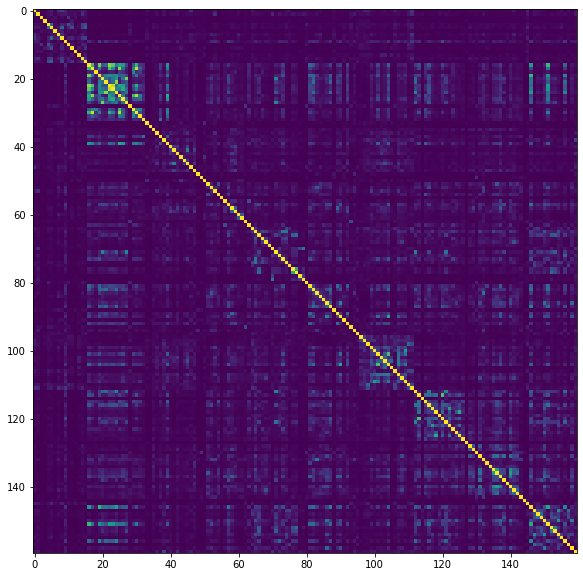

In [111]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

ax.imshow(overall_mat.detach().numpy())

## supernet

In [6]:
def convert_supernet_circ_into_gate_circ(subnet, num_embeds, layer_rots, layer_cnots, num_qubits, angle_embed=False):
    circ_gates = []
    gate_params = []
    weights_bounds = [0]
    inputs_bounds = [0]

    curr_layers = subnet
    
    for i in range(1):
        num_qubits = len(layer_rots[0])

        if angle_embed:
            rots = ['ry', 'rx', 'rz']
            
            for j in range(num_embeds):
                circ_gates += [rots[j % 3] for i in range(num_qubits)]
                gate_params += [[i] for i in range(num_qubits)]
                weights_bounds += [0 for i in range(num_qubits)]
                inputs_bounds += [inputs_bounds[-1] + i + 1 for i in range(2 * num_qubits - 1)]            
        else:
            for j in range(num_embeds):
                circ_gates += ['h' for i in range(num_qubits)] + ['ry' for i in range(num_qubits)] + ['cry' for i in range(num_qubits - 1)]
                gate_params += [[i] for i in range(num_qubits)] * 2 + [[i, i + 1] for i in range(num_qubits - 1)]
                weights_bounds += [0 for i in range(3 * num_qubits - 1)]
                inputs_bounds += [inputs_bounds[-1] for i in range(num_qubits)] + [inputs_bounds[-1] + i + 1 for i in range(2 * num_qubits - 1)]

        for j in range(len(curr_layers)):
            circ_gates += layer_rots[curr_layers[j]]
            circ_gates += ['cx' for k in layer_cnots[curr_layers[j]]]

            gate_params += [[k] for k in range(len(layer_rots[curr_layers[j]]))]
            gate_params += layer_cnots[curr_layers[j]]

            weights_bounds += [weights_bounds[-1] + k + 1 for k in range(num_qubits)]
            inputs_bounds += [inputs_bounds[-1] for k in range(num_qubits)]

            weights_bounds += [weights_bounds[-1] for k in range(len(layer_cnots[curr_layers[j]]))]
            inputs_bounds += [inputs_bounds[-1] for k in range(len(layer_cnots[curr_layers[j]]))]
            
    return circ_gates, gate_params, inputs_bounds, weights_bounds

In [ ]:
import pennylane as qml
import numpy as np
import os

from datasets_nt import load_dataset
from create_gate_circs import create_batched_gate_circ
from create_noise_models import noisy_dev_from_backend

dataset = 'bank'
main_dir = './supernet/bank/'

x_train, y_train, x_test, y_test = load_dataset(dataset, 'supernet', 2)

num_qubits = 4
num_cnot_configs = 4096
num_circs = 2500
num_embed_layers = 2

device_name = 'ibmq_lima'
# dev = qml.device('lightning.qubit', wires=num_qubits)
dev = noisy_dev_from_backend(device_name, num_qubits)

param_nums = [12]

for p in param_nums:
    supernet_dir = main_dir + 'search-{}_params_mb'.format(p)

    num_layers = p // num_qubits

    layer_gates = [i[1:].split(')') for i in open(supernet_dir + '/search_space.txt').read().split('\n')][:-1]

    layer_rots = [''.join([j for j in i[0] if j.isupper()]) for i in layer_gates]
    layer_rots = [[i[j * 2:j * 2 + 2].lower() for j in range(len(i) // 2)] for i in layer_rots]

    layer_cnots = [''.join([j for j in i[1][1:] if j not in ['[', ']', ',', ' ']]) for i in layer_gates]
    layer_cnots = [[[int(i[2 * j]), int(i[2 * j + 1])] for j in range(len(i) // 2)] for i in layer_cnots]
        
    search_space = len(layer_rots)
        
    accs = []
    losses = []
    circ_layers = []

    params = np.genfromtxt(supernet_dir + '/training_params.txt')[-1].reshape((num_layers, search_space // num_cnot_configs, num_qubits))
        
    supernet_device_dir = supernet_dir + '/' + device_name
    
    if not os.path.exists(supernet_device_dir):
        os.mkdir(supernet_device_dir)
        
    for i in range(num_circs):
        curr_circ_desc = np.random.randint(0, search_space, num_layers)

        curr_params = np.concatenate([params[k, curr_circ_desc[k] // num_cnot_configs] for k in range(num_layers)]).flatten()

        circ_gates, gate_params, inputs_bounds, weights_bounds = convert_supernet_circ_into_gate_circ(curr_circ_desc, num_embed_layers, layer_rots, layer_cnots,
                                                                                                          num_qubits, False) 

        
        circ = create_batched_gate_circ(dev, circ_gates, gate_params, inputs_bounds,
                                                                weights_bounds, [0], 'exp')

        val_exp_list = []
        
        for j in range(np.ceil(len(x_test) / 32).astype('int32')):
            curr_batch_params = np.concatenate([[curr_params] for k in range(min(32, len(x_test) - 32 * j))], 0)
            
            val_exp_list.append(circ(x_test[32 * j:min(len(x_test), 32* j + 32)], curr_batch_params))
            
        val_exps = np.concatenate(val_exp_list)
        val_losses = np.power(val_exps - y_test, 2)
        val_loss = np.mean(val_losses)
        acc = np.mean(val_losses < 1)
            
        print(curr_circ_desc, acc, val_loss)

        accs.append(acc)
        losses.append(val_loss)
        circ_layers.append(curr_circ_desc)
        
    np.savetxt(supernet_device_dir + '/searched_circ_layers.txt', np.array(circ_layers))
    np.savetxt(supernet_device_dir + '/searched_circ_accs.txt', accs)
    np.savetxt(supernet_device_dir + '/searched_circ_losses.txt', losses)    

In [4]:
!pip install pennylane-qiskit qiskit

  Using cached PennyLane_qiskit-0.24.0-py3-none-any.whl (34 kB)
  Using cached qiskit-0.38.0-py3-none-any.whl
  Using cached mthree-1.1.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.3 MB)
  Using cached qiskit_aer-0.11.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.2 MB)
  Using cached qiskit_terra-0.21.2-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.7 MB)
  Using cached qiskit_ibmq_provider-0.19.2-py3-none-any.whl (240 kB)
  Using cached websockets-10.3-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (112 kB)
  Using cached requests_ntlm-1.1.0-py2.py3-none-any.whl (5.7 kB)
  Using cached websocket_client-1.4.1-py3-none-any.whl (55 kB)
  Using cached symengine-0.9.2-cp37-cp37m-manylinux2010_x86_64.whl (37.5 MB)
  Using cached shared_memory38-0.1.2-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (25 kB)
  Using cached stevedore-3.5.0-py3-none-any.whl (49 kB)
  Using cached ply-3.11-py

In [ ]:
!python supernet/train_search_mnist.py --warmup_epochs 0 --steps 25000 --n_search 1 --n_qubits 4 --n_experts 1 --n_layers 5 --n_encode_layers 4 --save "20_params" --data "./experiment_data/mnist_2/" --save_dir "./supernet/mnist_2"

2022-09-23 05:05:06.356279: W tensorflow/core/profiler/internal/smprofiler_timeline.cc:460] Initializing the SageMaker Profiler.
2022-09-23 05:05:06.356401: W tensorflow/core/profiler/internal/smprofiler_timeline.cc:105] SageMaker Profiler is not enabled. The timeline writer thread will not be started, future recorded events will be dropped.
2022-09-23 05:05:06.388106: W tensorflow/core/profiler/internal/smprofiler_timeline.cc:460] Initializing the SageMaker Profiler.
(1600, 4, 4) (400, 4, 4)
subnet: [266545, 192677, 286962, 125027, 24644], expert_idx: 0
2022-09-23 05:05:19.928932: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  AVX512F
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-23 05:05:19.935736: I tensorflow/core/platform/profile_utils/cpu_utils.cc:104] CPU Frequenc

## Train our circuits

In [ ]:
from datasets_nt import load_dataset
from create_gate_circs import get_circ_params, create_gate_circ
from train_circ import train_qnn, mse_vec_loss
from create_noise_models import noisy_dev_from_backend

import pennylane as qml
import numpy as np
import os

search_nums = [100]
param_nums = [20, 24]

dataset = 'fmnist_4'
num_reps = 1

num_qubits = 4
dev = qml.device('lightning.qubit', wires=num_qubits)
meas_qubits = [0, 1]
mat_size = 4096

device_name = 'ibmq_lima'
noisy_dev = noisy_dev_from_backend(device_name, num_qubits)

ours_dir = './ours/fmnist_4/'

x_train, y_train, x_test, y_test = load_dataset(dataset, 'angle', num_reps)

for search_num in search_nums:       
    for param_num in param_nums:
        noise_scores = []
        
        for i in range(2500):
            noise_scores.append(np.genfromtxt(ours_dir + '/{}_params/circ_{}/noise_metric/{}/metric_tvd_score.txt'.format(param_num, i + 1, device_name)))
            
        noise_scores = np.array(noise_scores)
        
        mean_t_mat_scores = np.genfromtxt(ours_dir + '{}_params/d2_mean_t_mat_scores.txt'.format(param_num))
        perf_scores = (mat_size - mean_t_mat_scores) / mat_size
        combined_scores = np.multiply(perf_scores, noise_scores)
        
        circ_inds = np.random.permutation(2500)
        
        curr_dir = ours_dir + '/{}_params/search_{}_{}'.format(param_num, search_num, device_name)
        
        if not os.path.exists(curr_dir):
            os.mkdir(curr_dir)

        for j in range(25):
            curr_trial_dir = curr_dir + '/trial_{}'.format(j + 1)

            if not os.path.exists(curr_trial_dir):
                os.mkdir(curr_trial_dir)
        
            sel_inds = circ_inds[range(j * 100, j * 100 + 100)]
            sel_ind = sel_inds[np.argmax(combined_scores[sel_inds])]

            np.savetxt(curr_trial_dir + '/searched_circuit_inds.txt', sel_inds)
            np.savetxt(curr_trial_dir + '/searched_circuit_scores.txt', combined_scores[sel_inds])
            np.savetxt(curr_trial_dir + '/sel_circuit_ind.txt', [sel_ind])
            np.savetxt(curr_trial_dir + '/sel_circuit_score.txt', [combined_scores[sel_ind]])
            
            print(sel_inds, combined_scores[sel_inds])
            print(sel_ind, combined_scores[sel_ind])
            print(noise_scores[sel_ind], perf_scores[sel_ind])

            circ_gates, gate_params, inputs_bounds, weights_bounds = get_circ_params(ours_dir + '{}_params/circ_{}'.format(param_num, sel_ind + 1))

            circ = create_gate_circ(dev, circ_gates, gate_params, inputs_bounds,
                                                                weights_bounds, meas_qubits, 'exp', 'adjoint')
            
            noisy_circ = create_gate_circ(noisy_dev, circ_gates, gate_params, inputs_bounds,
                                                                weights_bounds, meas_qubits, 'exp', None)
        
            losses_list = []
            accs_list = []
            noisy_losses_list = []
            noisy_accs_list = []

            for j in range(5):
                curr_train_dir = curr_trial_dir + '/run_{}'.format(j + 1)

                if os.path.exists(curr_train_dir):
                    pass
                else:
                    os.mkdir(curr_train_dir)


                info = train_qnn(circ, x_train, y_train, x_test, y_test, [weights_bounds[-1]], 16000, 0.05, 1, mse_vec_loss, verbosity=17300, 
                                                                                                loss_window=50, init_params=None, 
                                                                                                acc_thres=1.1, shuffle=True, print_loss=50)

                val_exps = [circ(x_test[i], info[-1][-1]) for i in range(len(x_test))]
                val_loss = np.array([mse_vec_loss(y_test[k], val_exps[k]) for k in range(len(x_test))]).flatten()
                
                noisy_val_exps = [noisy_circ(x_test[i], info[-1][-1]) for i in range(len(x_test))]
                noisy_val_loss = np.array([mse_vec_loss(y_test[k], noisy_val_exps[k]) for k in range(len(x_test))]).flatten()

#                 acc = np.mean(val_loss < 1)
#                 noisy_acc = np.mean(noisy_val_loss < 1)
                acc = np.mean(np.sum(np.multiply(val_exps, y_test) > 0, 1) == 2)
                noisy_acc = np.mean(np.sum(np.multiply(noisy_val_exps, y_test) > 0, 1) == 2)

                np.savetxt(curr_train_dir + '/params_{}.txt'.format(j + 1), info[-1])
                np.savetxt(curr_train_dir + '/losses_{}.txt'.format(j + 1), info[0])             

                losses_list.append(val_loss)
                accs_list.append(acc)
                
                noisy_losses_list.append(noisy_val_loss)
                noisy_accs_list.append(noisy_acc)

            np.savetxt(curr_trial_dir + '/accs.txt', accs_list)
            np.savetxt(curr_trial_dir + '/val_losses.txt', losses_list)          
            np.savetxt(curr_trial_dir + '/noisy_accs.txt', noisy_accs_list)
            np.savetxt(curr_trial_dir + '/noisy_val_losses.txt', noisy_losses_list) 

ibmqfactory.load_account:WARNING:2022-09-28 08:08:08,732: Credentials are already in use. The existing account in the session will be replaced.


[1091  483 2033 2383 1431 1940 1595 1409  932  744  826  856  289  501
  655 2156  145 1487 1260  169  801  731 1208 1198  696 2368 2444  627
 1887  492 1476  549 2167  889 1559 1365 1426    5   62 2082  720 1386
 1393 1289 1836   85  535 1874  374 1728  328 1017 1661    7  972 2318
 2118 1478 1517  593 1126 1743  787   37 1407 2446 2151  515  559 1933
  838 1960   72  604 1502  229 2382 1612 2076  313  401 2212 1039   44
 2178 1026 2255 1698 1818 1144 2032 1257  625 1303  337 1930 1442 2115
 2192 1072] [0.73005717 0.69252977 0.75933413 0.69670997 0.64488682 0.72362488
 0.67361456 0.73261076 0.74365658 0.64855466 0.69069077 0.77061042
 0.72143045 0.68627325 0.43232428 0.76281446 0.67268712 0.77791441
 0.68510105 0.69801382 0.77351881 0.71320305 0.61773136 0.72091305
 0.67458034 0.69637016 0.75506948 0.73932606 0.70385377 0.62686416
 0.73342242 0.73480707 0.61192711 0.62623635 0.69091555 0.7560822
 0.66333645 0.72343101 0.63039414 0.62693306 0.66792519 0.72012884
 0.69190784 0.70228061 

## train correlation circuits

In [22]:
from importlib import reload
import datasets_nt

reload(datasets_nt)

<module 'datasets_nt' from '/root/datasets_nt.py'>

In [ ]:
from datasets_nt import load_dataset
from create_gate_circs import create_gate_circ, get_circ_params
from train_circ import train_qnn, mse_vec_loss

import pennylane as qml
import numpy as np
import os

dataset = 'mnist_4'

x_train, y_train, x_test, y_test = load_dataset(dataset, 'angle', 1)

print(x_train.shape)

num_qubits = 4
num_embeds = 16
num_params = 32

for i in range(50, 65):
    curr_dir = './experiment_data/mnist_4/trained_circuits/circ_{}'.format(i + 1)
    circ_gates, gate_params, inputs_bounds, weights_bounds = get_circ_params(curr_dir) 

    circ = create_gate_circ(qml.device('lightning.qubit', wires=num_qubits), circ_gates, gate_params, inputs_bounds,
                                                    weights_bounds, [0, 1], 'exp')    

    losses_list = []
    accs_list = []
    
    for j in range(1):
        curr_train_dir = curr_dir + '/run_{}'.format(j + 1)

        if os.path.exists(curr_train_dir):
            pass
        else:
            os.mkdir(curr_train_dir)
    
        
        info = train_qnn(circ, x_train, y_train, x_test, y_test, [num_params], 16000, 0.05, 1, mse_vec_loss, verbosity=127300, 
                                                                                        loss_window=50, init_params=None, 
                                                                                        acc_thres=1.1, shuffle=True, print_loss=50)
        
        val_exps = [circ(x_test[i], info[-1][-1]) for i in range(len(x_test))]
        val_loss = np.array([mse_vec_loss(y_test[k], val_exps[k]) for k in range(len(x_test))]).flatten()

        acc = np.mean(np.sum(np.multiply(val_exps, y_test) > 0, 1) == 2)
        
        np.savetxt(curr_train_dir + '/params_{}.txt'.format(j + 1), info[-1])
        np.savetxt(curr_train_dir + '/losses_{}.txt'.format(j + 1), info[0])
        
        losses_list.append(val_loss)
        accs_list.append(acc)
        
    np.savetxt(curr_dir + '/val_losses.txt', losses_list)
    np.savetxt(curr_dir + '/accs.txt', accs_list)

(8000, 16)
[2022-10-19 08:16:42.295 tensorflow-2-3-cpu-py-ml-t3-medium-dbca98283d57d615662c4efa28c8:28 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2022-10-19 08:16:42.529 tensorflow-2-3-cpu-py-ml-t3-medium-dbca98283d57d615662c4efa28c8:28 INFO profiler_config_parser.py:102] Unable to find config at /opt/ml/input/config/profilerconfig.json. Profiler is disabled.
Step 1 | Sliding Loss Window : 2.0585027670945735
Step 51 | Sliding Loss Window : 1.622913617420368
Step 101 | Sliding Loss Window : 1.643977672324379
Step 151 | Sliding Loss Window : 1.3790320180656328
Step 201 | Sliding Loss Window : 1.209902928555085
Step 251 | Sliding Loss Window : 1.127645131514105
Step 301 | Sliding Loss Window : 1.152621094899257
Step 351 | Sliding Loss Window : 1.2084384994405584
Step 401 | Sliding Loss Window : 0.9669426851925617
Step 451 | Sliding Loss Window : 1.1709646634413087
Step 501 | Sliding Loss Window : 1.123326784538358
Step 551 | Sliding Loss Window : 1.0220899558357732
Step 601 | 

In [ ]:
from create_noise_models import noisy_dev_from_backend
from datasets_nt import load_dataset
from create_gate_circs import create_gate_circ, get_circ_params
from train_circ import train_qnn, mse_loss

import numpy as np
import os

dataset = 'fmnist_4'

x_train, y_train, x_test, y_test = load_dataset(dataset, 'angle', 1)

num_qubits = 4
num_embeds = 16
num_params = 18

device_name = 'ibmq_lima'

# dev = qml.device('lightning.qubit', wires=num_qubits)
dev = noisy_dev_from_backend(device_name, num_qubits)

for i in range(200, 400):
    curr_dir = './experiment_data/{}/trained_circuits/circ_{}'.format(dataset, i + 1)
    circ_gates, gate_params, inputs_bounds, weights_bounds = get_circ_params(curr_dir) 

    circ = create_gate_circ(dev, circ_gates, gate_params, inputs_bounds,
                                                    weights_bounds, [0], 'exp')
    
    
    noiseless_losses = np.genfromtxt(curr_dir + '/val_losses.txt')

    losses_list = []
    accs_list = []
    
    curr_dev_dir = curr_dir + '/' + device_name

#     if not os.path.exists(curr_dev_dir + '/accs_inference_only.txt'):
    if True:
        if not os.path.exists(curr_dev_dir):
            os.mkdir(curr_dev_dir)

        for j in range(5):
            curr_train_dir = curr_dir + '/run_{}'.format(j + 1)
            curr_params = np.genfromtxt(curr_train_dir + '/params_{}.txt'.format(j + 1))[-1]

            val_exps = [circ(x_test[i], curr_params) for i in range(len(x_test))]
            val_loss = np.array([mse_vec_loss(y_test[k], val_exps[k]) for k in range(len(x_test))]).flatten()

            acc = np.mean(np.sum(np.multiply(val_exps, y_test) > 0, 1) == 2)
#             acc = np.mean(val_loss < 1)

            losses_list.append(val_loss)
            accs_list.append(acc)

        print(np.mean(noiseless_losses), np.mean(losses_list), i + 1)

        np.save(curr_dev_dir + '/val_losses_inference_only.npy', losses_list)
        np.savetxt(curr_dev_dir + '/accs_inference_only.txt', accs_list)
    else:
        print(i)

ibmqfactory.load_account:WARNING:2022-10-24 04:06:24,690: Credentials are already in use. The existing account in the session will be replaced.


1.2173890654772193 1.4748181733456003 201
1.0869884485243808 1.3934497278049196 202
